# Preprocessing for Full Model 

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

%matplotlib inline

## Training Setup

### Load features data frame

In [2]:
# Path to pickle of training features pandas dataframe
baseBufferPklFile = 'DataFrames/FullTrainFeatsDF.pkl'

In [3]:
# load baseBufferPkl
df = pd.read_pickle(baseBufferPklFile)

# create a label column with 'unlabbled' label
df = df.assign(Label=-1)

# create a predicted label column with 'unlabelled' label
df = df.assign(predictLabel=-1)

print(df.shape)

(5000, 411)


In [4]:
print(df.describe())
print(df.columns.values)

              Beam       BestDM        Block        DMmax       DMmean  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      4.409000    41.420461    26.506600    57.862880    42.622288   
std       2.372181    80.313080    54.998696   102.397292    78.245971   
min       1.000000     0.100000     1.000000     0.100000     0.100000   
25%       2.000000     2.700000     3.000000     3.100000     2.595536   
50%       4.000000     9.000000     9.000000     9.800000     9.111806   
75%       7.000000    27.700001    30.000000    53.025001    35.968908   
max       8.000000   639.600037  1011.000000   639.799988   503.154722   

          DMmedian        DMmin        Events  GaussianTestsksD  \
count  5000.000000  5000.000000  5.000000e+03       4964.000000   
mean     42.648351    26.750420  7.333751e+03          0.160504   
std      79.722249    58.020225  7.419277e+04          0.169688   
min       0.100000     0.000000  4.000000e+00          0.005282  

### Load labels from original data and test 
#### Load in label pkl's

In [5]:
LABEL_PKL_FILE1 = 'C:/Users/jlsha/MPhysProject/LOFAR_Pulses/LOFAR_Pulses/Data/artemisLabels_Set2_Jamie.pkl'
labelDict1 = pickle.load(open(LABEL_PKL_FILE1, 'rb'))
print('Number of lables:', len(labelDict1))
print('Unique set of labels:', set(labelDict1.values()))

Number of lables: 4000
Unique set of labels: {'s', '5', '1', '9', 'a', '2', '8', '3', '7', '0', '6', '4'}


In [6]:
LABEL_PKL_FILE2 = 'C:/Users/jlsha/MPhysProject/LOFAR_Pulses/LOFAR_Pulses/Data/artemisTestLabels.pkl'
labelDict2 = pickle.load(open(LABEL_PKL_FILE2, 'rb'))
print('Number of lables:', len(labelDict2))
print('Unique set of labels:', set(labelDict2.values()))

Number of lables: 1000
Unique set of labels: {'s', '5', '1', '9', 'a', '2', '8', '3', '7', '0', '6', '4'}


#### Combine label dictionaries into one

In [7]:
labelDict1.update(labelDict2)
print('Number of lables:', len(labelDict1))
print('Unique set of labels:', set(labelDict1.values()))

Number of lables: 5000
Unique set of labels: {'s', '5', '1', '9', 'a', '2', '8', '3', '7', '0', '6', '4'}


In [8]:
# Label string to integer map
labelStr2IntDict = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,
                    'a':10, 's':11}

labelSeries = pd.Series
for key,val in labelDict1.items():
    df.loc[key, 'Label'] = labelStr2IntDict[val]

#### Labels

* 0 : Interesting, follow up
* 1 : Narrow freq, variable, pulsed
* 2 : Constant, narrow in freq
* 3 : Narrow in time, pulsed across the beam
* 4 : Variable freq vs time
* 5 : Flat baseline noise
* 6 : State change
* 7 : Overflow
* 8 : Broadband RFI
* 9 : Impulse
* 10 : Low DM Pulsars (DM 2-15)
* 11 : High DM Pulsars (DM > 15)

In [9]:
print(df['Label'].value_counts()) # label counts

10    1523
9     1272
4      466
3      356
11     263
2      261
7      257
5      215
6      133
8      114
1       71
0       69
Name: Label, dtype: int64


In [25]:
df.iloc[744]

Beam                                        4.000000
BestDM                                    171.199997
Block                                      11.000000
DMmax                                     199.500000
DMmean                                    165.488477
DMmedian                                  167.699997
DMmin                                      80.800003
Events                                    321.000000
GaussianTestsksD                            0.041508
GaussianTestskspvalue                       0.523557
GaussianTestskurtosis                       1.012112
GaussianTestsskew                          -0.288600
MJDStart                                57179.399713
MJDmax                                  57179.399746
MJDmean                                 57179.399742
MJDmedian                               57179.399743
MJDmin                                  57179.399738
MJDstd                                      0.000002
MaxSNR                                     11.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000154A903B748>]],
      dtype=object)

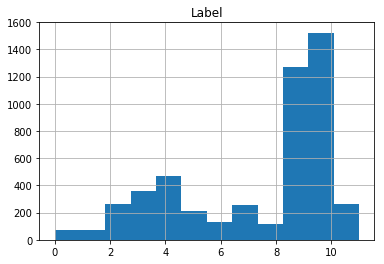

In [10]:
df.hist('Label', bins=len(df['Label'].unique()))

#### Compute MJD Features

We don't care about the absolute MJDs, but the relative offset within the dataset.

In [11]:
df['relMJDmax'] = df['MJDmax'] - df['MJDmin']
df['relMJDmean'] = df['MJDmean'] - df['MJDmin']
df['relMJDmedian'] = df['MJDmedian'] - df['MJDmin']

#### Filter for only labelled data (i.e. Label > -1)

In [12]:
labelledDf = df[df['Label'] > -1].copy()

#### Select out the labels

In [13]:
labels = labelledDf['Label'].values

#### Sanity check
Make sure the features don't have extreme values

In [14]:
for col in labelledDf:
    if labelledDf[col].dtype == object: print(col, labelledDf[col].min(), labelledDf[col].max())
    else: print(col, labelledDf[col].min(), labelledDf[col].max(), labelledDf[col].std())

Beam 1 8 2.372181369307533
BestDM 0.10000000149012 639.60003662109 80.31308027151937
Block 1 1011 54.998695691312356
DMmax 0.10000000149011999 639.79998779297 102.39729156927233
DMmean 0.10000000149011999 503.15472229242846 78.24597096655467
DMmedian 0.10000000149011999 619.0 79.72224859275926
DMmin 0.0 318.39999389648 58.02022460267964
Events 4 3026132 74192.77098429258
GaussianTestsksD 0.0052822115053891006 0.5406166487063576 0.16968848782627044
GaussianTestskspvalue 0.0 0.9999994330958465 0.310198569576694
GaussianTestskurtosis -3.0 24409.000587580922 907.2015597979077
GaussianTestsskew -156.24020385742188 77.18482208251953 12.291239288053024
MJDStart 16767.498375356998 58202.037565258 2328.821138645233
MJDmax 16767.49838992 58202.037590077 2328.821140173643
MJDmean 16767.49838331881 58202.037589989784 2328.8211401978747
MJDmedian 16767.498389192 58202.03759001599 2328.821140173249
MJDmin 16767.498376813 58202.037589812004 2328.8211399906245
MJDstd 0.0 3.0286356403652448e-05 4.69044

pixelsmin_4_3 -381054.46875 3810215.75 55931.86471774468
pixelsmin_5_0 -381054.46875 3810230.0 55940.178843486996
pixelsmin_5_1 -381054.46875 3810188.75 55939.71446762884
pixelsmin_5_2 -27262596.0 44.047149658203125 397684.7957754063
pixelsmin_5_3 -381054.46875 3810215.75 55940.277676293554
pixelsmin_6_0 -381054.46875 3810230.0 55933.0229019842
pixelsmin_6_1 -381054.46875 3810188.75 55932.52008606214
pixelsmin_6_2 -27262596.0 43.164066314697266 397605.5806487967
pixelsmin_6_3 -381054.46875 3810215.75 55933.11799731198
pixelsmin_7_0 -400993.875 3810230.0 55948.176242034235
pixelsmin_7_1 -400993.875 3810188.75 55947.74100284543
pixelsmin_7_2 -27262596.0 44.272125244140625 397569.07115282596
pixelsmin_7_3 -400993.875 3810215.75 55948.21135625306
pixelsmin_8_0 -141424.109375 3810230.0 55670.12256151689
pixelsmin_8_1 -141424.109375 3810188.75 55669.61719342961
pixelsmin_8_2 -27262596.0 43.64622497558594 397609.50895128073
pixelsmin_8_3 -141424.109375 3810215.75 55670.25366785043
pixelsmin_9

windTimeSeriessnr8 -13749632.0 25.611976748667438 194624.4178609631
windTimeSeriessnr9 -13749632.0 22.094651938668385 194682.93702675184
windTimeSeriesstd0 0.0 4439202.5 88023.51882930574
windTimeSeriesstd1 0.0 5300118.0 113933.86668287184
windTimeSeriesstd10 0.0 4087827.75 77101.49595933857
windTimeSeriesstd11 0.0 2355365.75 55524.98120966837
windTimeSeriesstd12 0.0 2723339.25 45128.21477505845
windTimeSeriesstd13 0.0 2512014.0 72949.27258108607
windTimeSeriesstd14 0.0 33454008.0 485414.6034951249
windTimeSeriesstd15 0.0 94146336.0 1341679.2270613634
windTimeSeriesstd2 0.0 1715027.25 46548.70030322069
windTimeSeriesstd3 0.0 3467748.25 54717.35475126467
windTimeSeriesstd4 0.0 8996307.0 142119.0131984369
windTimeSeriesstd5 0.0 4459537.0 73094.49115304036
windTimeSeriesstd6 0.0 42003432.0 602180.0915278017
windTimeSeriesstd7 0.0 45288468.0 642239.3756764214
windTimeSeriesstd8 0.0 2859810.75 50888.27703065459
windTimeSeriesstd9 0.0 3260748.25 76383.45082924946
DMrange 0.0 639.79998779297 

#### Drop features that are not useful

In [15]:
featureDf = labelledDf.drop(['Block', 'Label', 'predictLabel'], axis=1)

## Pre-processing

Prepare the features for model building: outliers (inf, NaN) are replaced, the features are scaled to approximately zero mean, and unity variance.

In [16]:
import sklearn.preprocessing

Convert feature data frame to 2D array of floats

In [17]:
featuresArr = featureDf.values.astype('float32')
featureNames = list(featureDf.columns.values)
preProcLabels = labels.copy()

In [18]:
featuresArr[featuresArr == -1. * np.inf] = np.nan
featuresArr[featuresArr == np.inf] = np.nan
print('NaN values in feature array:', featuresArr[featuresArr == np.nan])

imp = sklearn.preprocessing.Imputer(strategy='mean').fit(featuresArr)

preProcFeats = imp.transform(featuresArr)

NaN values in feature array: []


### Scale Features

Robust scaling uses a median filter, this is better for non-Gaussian distributions

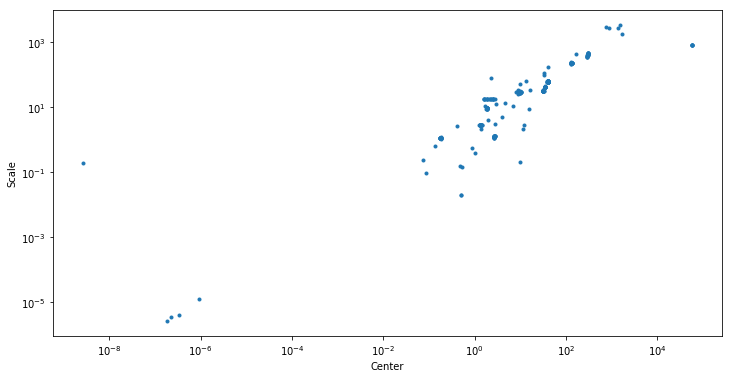

In [19]:
rScale = sklearn.preprocessing.RobustScaler().fit(preProcFeats)

plt.figure(figsize=(12, 6))
plt.loglog(rScale.center_, rScale.scale_, '.')
#plt.plot(rScale.center_, rScale.scale_, '.')
#for fnid, fName in enumerate(featureNames): plt.text(rScale.center_[fnid], rScale.scale_[fnid], fName)
plt.xlabel('Center')
plt.ylabel('Scale')

preProcFeats = rScale.transform(preProcFeats)

## Save the Features and labels arrays

#### Save Features array

In [20]:
np.save('Arrays/FeatsArray.npy',preProcFeats)
np.save('Arrays/LabelsList.npy',preProcLabels)
np.save('Arrays/FeatureNames.npy', featureNames)

In [21]:
np.load('Arrays/FeatsArray.npy')

array([[-6.0000002e-01, -1.6399999e-01, -9.6144222e-02, ...,
         4.2563360e-03,  6.0282260e-02,  2.6973015e-01],
       [-6.0000002e-01, -1.6399999e-01, -8.6129196e-02, ...,
        -6.7881033e-02, -6.7333467e-02, -4.7355585e-02],
       [ 4.0000001e-01,  3.4399998e+00,  1.7786679e+00, ...,
        -7.6887906e-02, -8.0826648e-02, -6.8440326e-02],
       ...,
       [-6.0000002e-01,  5.2000005e-02,  2.6039062e-02, ...,
        -6.2841006e-02, -5.5397801e-02, -2.4351511e-02],
       [-2.0000000e-01, -2.4399999e-01, -1.0015023e-01, ...,
        -5.7882141e-02, -4.4043116e-02, -9.5966546e-04],
       [-2.0000000e-01, -2.3999999e-01, -1.2819229e-01, ...,
         5.4990876e-02,  2.0422719e-01,  5.0514668e-01]], dtype=float32)